In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

excel_file_path = "./train.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


<Axes: xlabel='Sex', ylabel='count'>

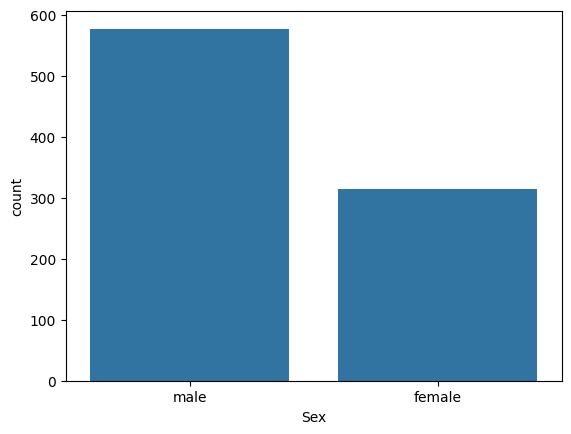

In [52]:
sns.countplot(x=df["Sex"])

<Axes: xlabel='Pclass', ylabel='count'>

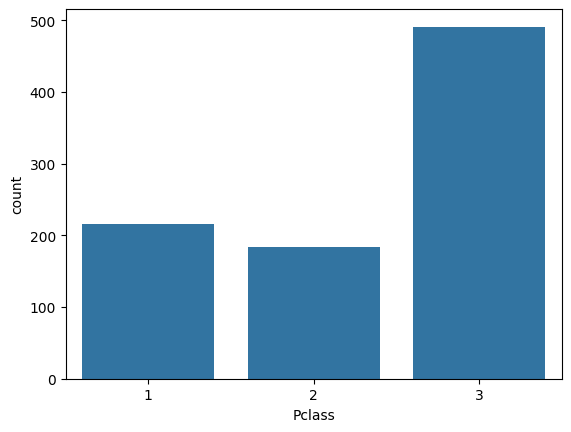

In [53]:
sns.countplot(x=df["Pclass"])

<Axes: ylabel='count'>

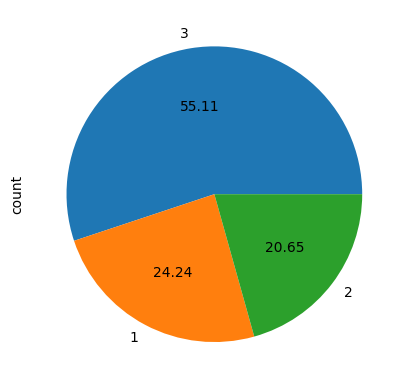

In [54]:
df["Pclass"].value_counts().plot(kind="pie", autopct="%.2f")

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

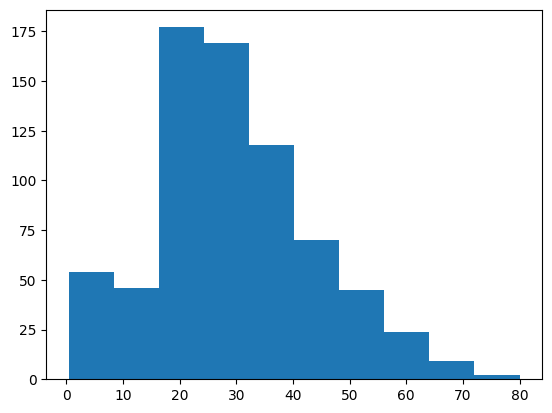

In [55]:
plt.hist(df["Age"], bins=10)

<Axes: xlabel='Age', ylabel='Density'>

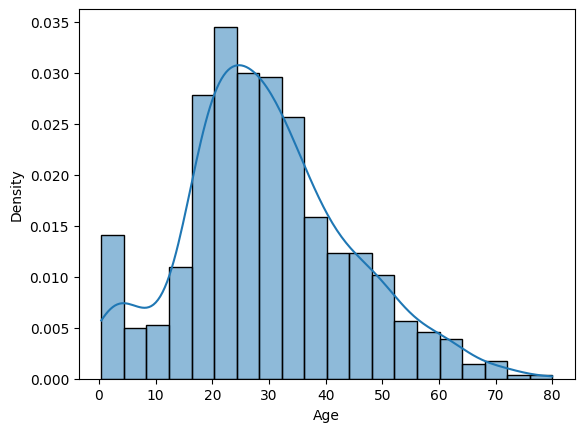

In [56]:
sns.histplot(data=df["Age"], kde=True, stat="density", log_scale=False)

<Axes: xlabel='Age'>

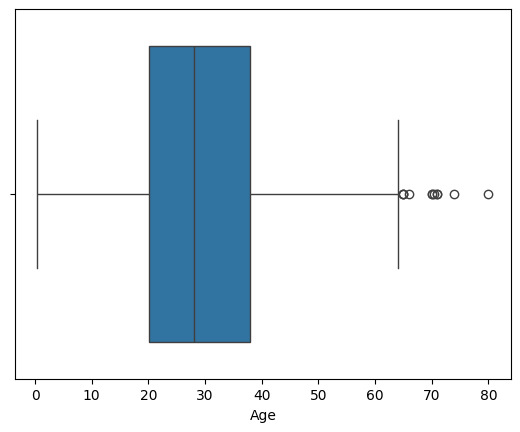

In [57]:
sns.boxplot(x=df["Age"])

<Axes: xlabel='Pclass', ylabel='Age'>

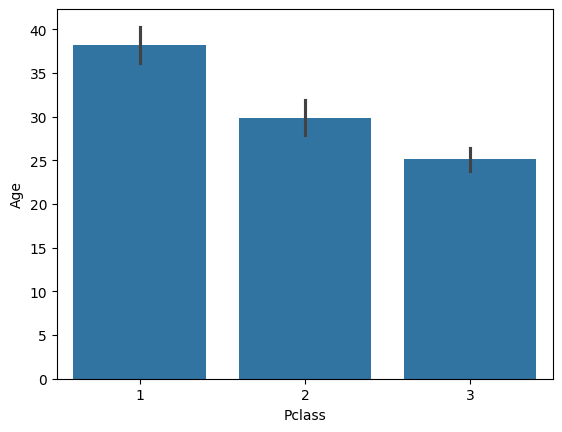

In [58]:
sns.barplot(x=df['Pclass'],y=df['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

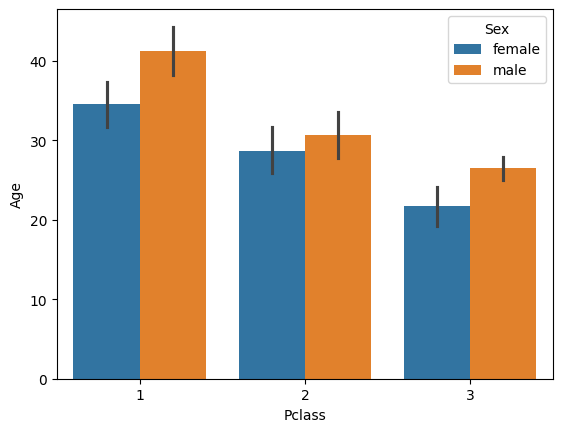

In [59]:
# comparing numerical - categorical data
sns.barplot(x=df['Pclass'],y=df['Age'], hue=df['Sex'])

<Axes: xlabel='Sex', ylabel='Age'>

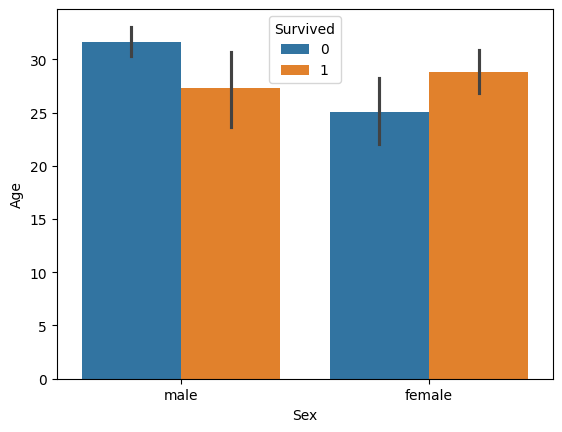

In [60]:
# comparing numerical - categorical data
sns.barplot(x=df['Sex'],y=df['Age'], hue=df['Survived'])

<Axes: xlabel='Sex', ylabel='Age'>

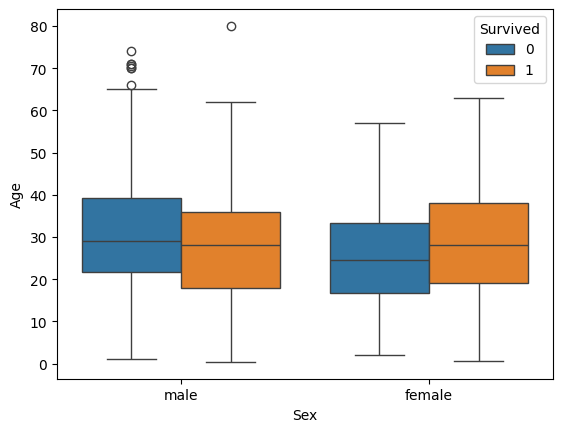

In [61]:
# comparing numerical - categorical data
sns.boxplot(x=df['Sex'],y=df['Age'], hue=df['Survived'])

<Axes: xlabel='Age', ylabel='Density'>

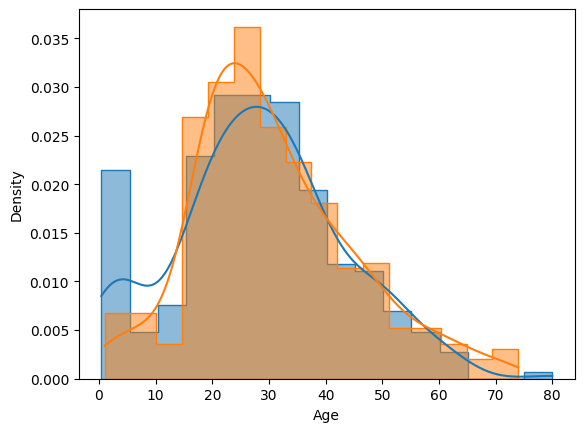

In [62]:
sns.histplot(data=df[df["Survived"]==1]["Age"], kde=True, stat="density", element='step')
sns.histplot(data=df[df["Survived"]==0]["Age"], kde=True, stat="density", element='step')

In [64]:
df_merged = (
    df.groupby(["Survived", "Sex"])
    .size()
    .reset_index()
    .rename(columns={0: "No. of occurences"})
)
print(df_merged)

   Survived     Sex  No. of occurences
0         0  female                 81
1         0    male                468
2         1  female                233
3         1    male                109


In [22]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Survived', ylabel='Sex'>

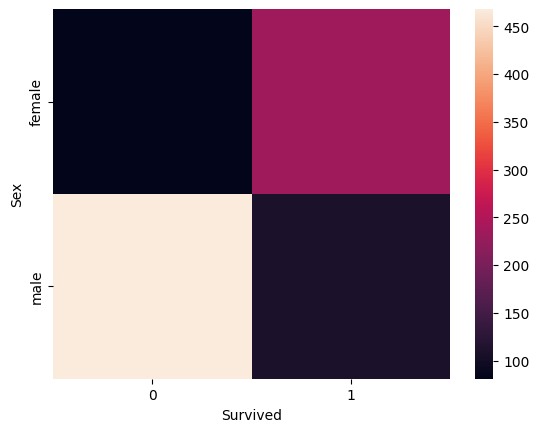

In [23]:
# comparing categorical - categorical data
sns.heatmap(pd.crosstab(df['Sex'], df['Survived']))

int64


<Axes: xlabel='Pclass'>

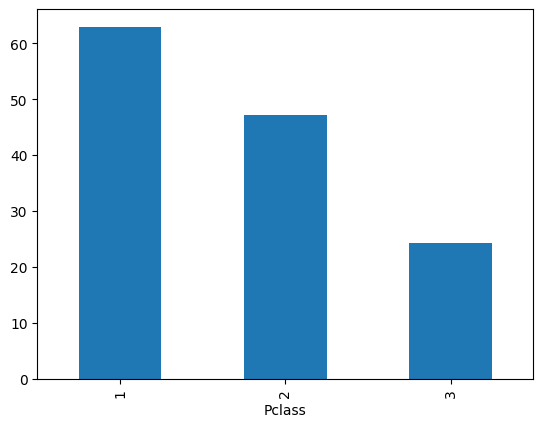

In [49]:
print(df['Pclass'].dtype)
(df.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

<Axes: xlabel='Survived', ylabel='Embarked'>

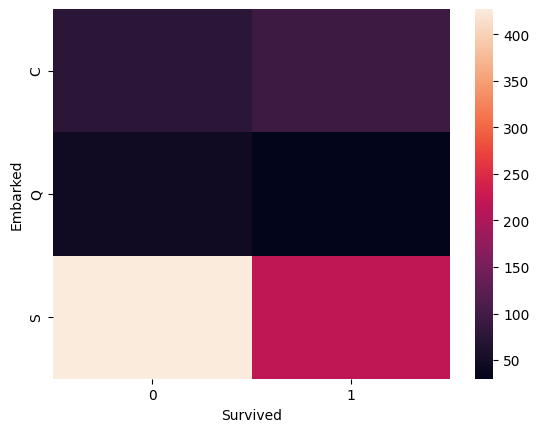

In [ ]:
sns.heatmap(pd.crosstab(df['Embarked'], df['Survived']))

<Axes: xlabel='Pclass', ylabel='Embarked'>

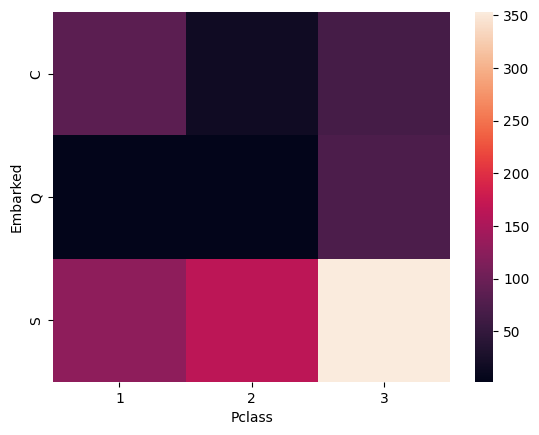

In [ ]:
sns.heatmap(pd.crosstab(df['Embarked'], df['Pclass']))

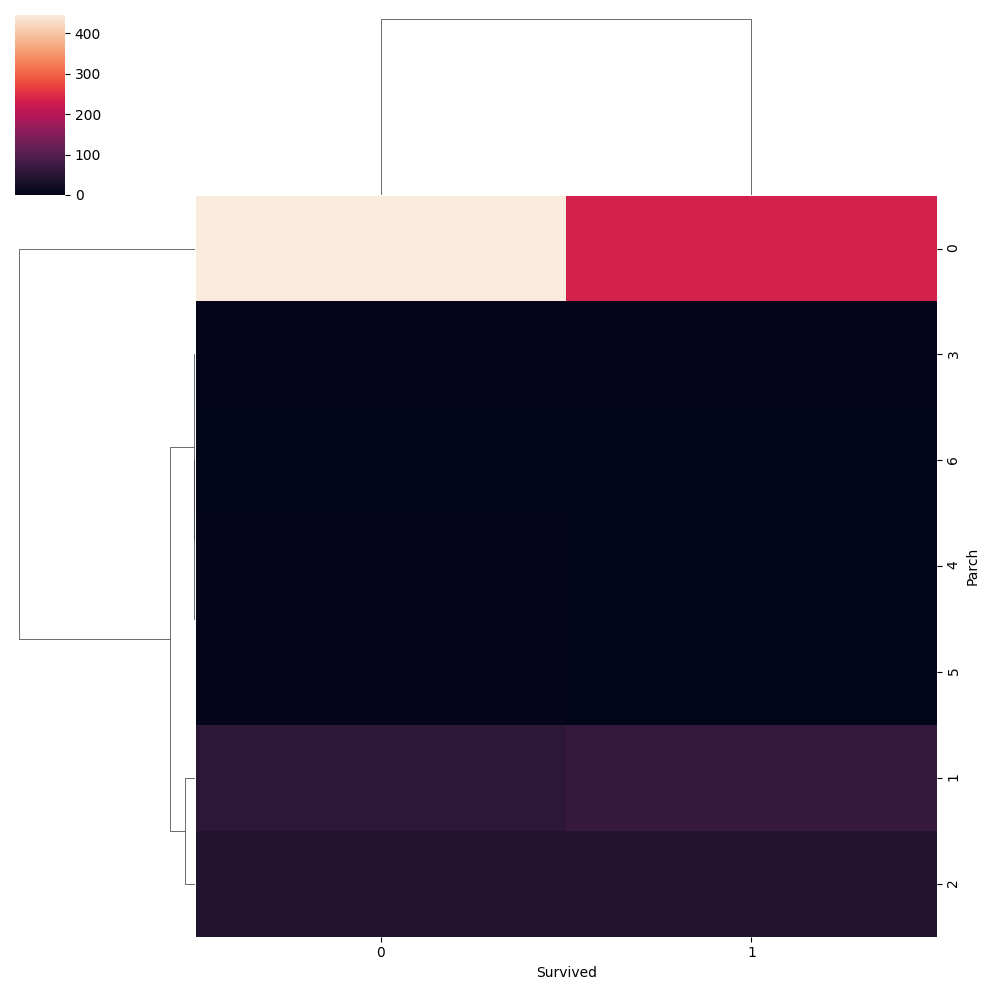

In [ ]:
# comparing categorical - categorical data
# clustermap tells closeness between values
sns.clustermap(pd.crosstab(df['Parch'], df['Survived']))

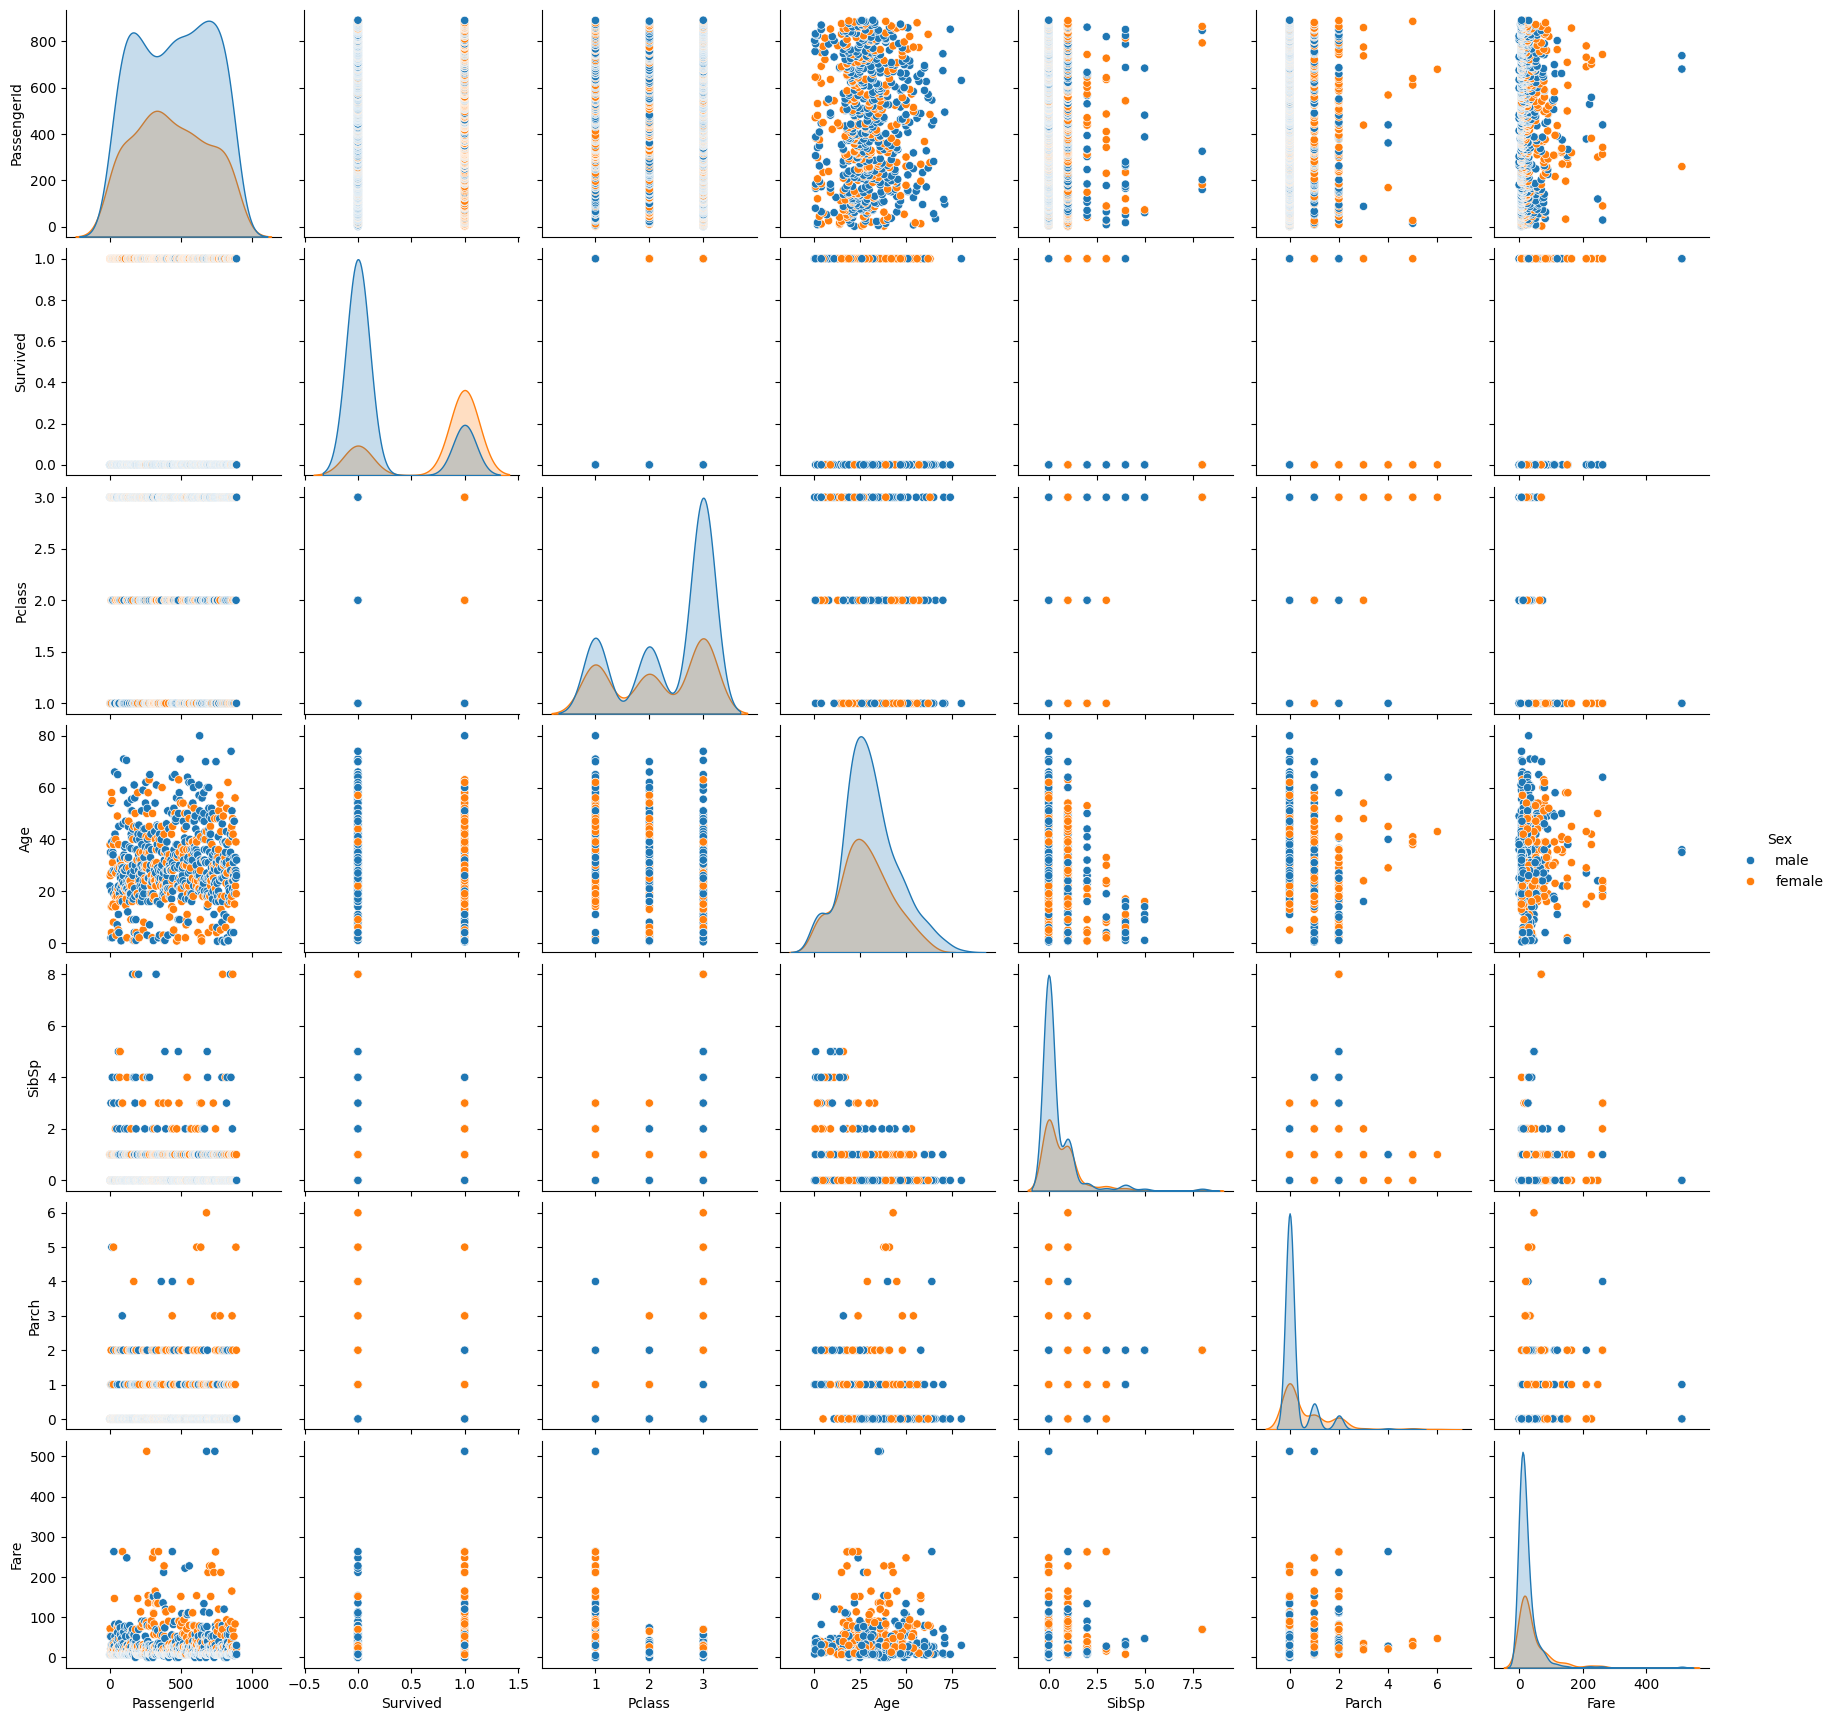

In [ ]:
# comparing numerical - numerical data
sns.pairplot(df, hue='Sex')